## Single Layer Perceptron Learning algorithm
### 📘 Real-World Scenario: "Weather vs Picnic"

Let’s predict whether it’s a good day for a picnic using the following features:

- **Feature 1 (X₁):** Is it sunny?  
  - `1` = Yes  
  - `0` = No

- **Feature 2 (X₂):** Is it windy?  
  - `1` = Yes  
  - `0` = No

### 🎯 Label (Outcome):

- `1` = Go for picnic  
- `0` = Stay home


In [39]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 100 samples
num_samples = 15

# Randomly generate features: 0 or 1 for Sunny and Windy
X = np.random.randint(0, 2, size=(num_samples, 2))

# Apply the rule: If sunny (1) and not windy (0) => Go for picnic (1), else Stay home (0)
y = np.array([
    1 if (sunny == 1 and windy == 0) else 0
    for sunny, windy in X
])

In [40]:
import pandas as pd

df = pd.DataFrame(X, columns=["Sunny", "Windy"])
df["Decision"] = y
print(df.head(10))  # Show first 10 rows (or use df.to_string() to show all)

   Sunny  Windy  Decision
0      0      1         0
1      0      0         0
2      0      1         0
3      0      0         0
4      0      1         0
5      0      0         0
6      0      0         0
7      1      0         1
8      1      1         0
9      1      0         1


In [41]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Assuming predictions and y (actual labels) are already computed
def predict(X, weights, bias):
    return [1 if np.dot(x, weights) + bias >= 0 else 0 for x in X]

# Cross-validation using K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
accuracies = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train perceptron model
    weights, bias = train_perceptron(X_train, y_train)

    # Test the model
    predictions = predict(X_test, weights, bias)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Average accuracy across all folds
average_accuracy = np.mean(accuracies)

# Displaying the average accuracy
print(f"\nAverage Cross-Validation Accuracy: {average_accuracy:.2f}")

Epoch 1
  Input: [0 0], Pred: 1, Error: -1, Weights: [0. 0.], Bias: -0.1
  Input: [0 1], Pred: 0, Error: 0, Weights: [0. 0.], Bias: -0.1
  Input: [0 0], Pred: 0, Error: 0, Weights: [0. 0.], Bias: -0.1
  Input: [0 1], Pred: 0, Error: 0, Weights: [0. 0.], Bias: -0.1
  Input: [0 0], Pred: 0, Error: 0, Weights: [0. 0.], Bias: -0.1
  Input: [0 0], Pred: 0, Error: 0, Weights: [0. 0.], Bias: -0.1
  Input: [1 0], Pred: 0, Error: 1, Weights: [0.1 0. ], Bias: 0.0
  Input: [1 1], Pred: 1, Error: -1, Weights: [ 0.  -0.1], Bias: -0.1
  Input: [1 0], Pred: 0, Error: 1, Weights: [ 0.1 -0.1], Bias: 0.0
  Input: [1 1], Pred: 1, Error: -1, Weights: [ 0.  -0.2], Bias: -0.1
  Input: [1 1], Pred: 0, Error: 0, Weights: [ 0.  -0.2], Bias: -0.1
  Input: [1 1], Pred: 0, Error: 0, Weights: [ 0.  -0.2], Bias: -0.1
Epoch 2
  Input: [0 0], Pred: 0, Error: 0, Weights: [ 0.  -0.2], Bias: -0.1
  Input: [0 1], Pred: 0, Error: 0, Weights: [ 0.  -0.2], Bias: -0.1
  Input: [0 0], Pred: 0, Error: 0, Weights: [ 0.  -0.2], 

In [42]:
# Assuming predictions and y (actual labels) are already computed
predictions = predict(X, weights, bias)  # already defined earlier

# Create a DataFrame
results_df = pd.DataFrame({
    'Input Feature 1 (Sunny)': X[:, 0],
    'Input Feature 2 (Windy)': X[:, 1],
    'Actual Label': y,
    'Predicted Label': predictions
})

# Map numeric labels to human-readable labels
label_map = {0: 'Stay at Home', 1: 'Go for Picnic'}
results_df['Actual Decision'] = results_df['Actual Label'].map(label_map)
results_df['Predicted Decision'] = results_df['Predicted Label'].map(label_map)


# Display the updated table
print("🧾 Prediction Results:\n")
display(results_df)

🧾 Prediction Results:



,Input Feature 1 (Sunny),Input Feature 2 (Windy),Actual Label,Predicted Label,Actual Decision,Predicted Decision
0,0,1,0,0,Stay at Home,Stay at Home
1,0,0,0,0,Stay at Home,Stay at Home
2,0,1,0,0,Stay at Home,Stay at Home
3,0,0,0,0,Stay at Home,Stay at Home
4,0,1,0,0,Stay at Home,Stay at Home
5,0,0,0,0,Stay at Home,Stay at Home
6,0,0,0,0,Stay at Home,Stay at Home
7,1,0,1,1,Go for Picnic,Go for Picnic
8,1,1,0,0,Stay at Home,Stay at Home
9,1,0,1,1,Go for Picnic,Go for Picnic


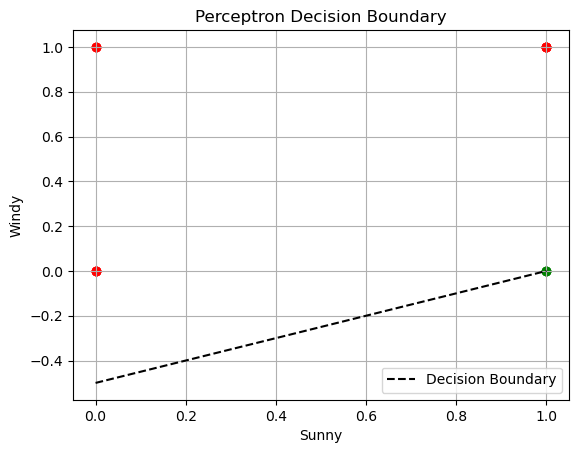

In [43]:
import matplotlib.pyplot as plt

for i, label in enumerate(y):
    color = 'green' if label == 1 else 'red'
    plt.scatter(X[i][0], X[i][1], c=color)

# Decision boundary: w1*x1 + w2*x2 + b = 0
# Let's solve for x2 in terms of x1
x_vals = np.array([0, 1])
y_vals = -(weights[0] * x_vals + bias) / weights[1]
plt.plot(x_vals, y_vals, '--k', label="Decision Boundary")

plt.xlabel("Sunny")
plt.ylabel("Windy")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()